In [ ]:
# !unzip -q /content/dataset_v2.zip -d /content/dataset/

In [ ]:
# !unzip -q /content/imgs.zip -d /content/imgs/

In [ ]:
# !rm -r /content/sample_data/
# !rm -r /content/dataset/


In [ ]:
dim = [96,96,3]

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,LayerNormalization,GlobalAveragePooling2D,AveragePooling2D
from keras.optimizers import Adam, RMSprop, SGD, Nadam, Adadelta, Adagrad, Adamax, Ftrl

from dataset_load_v2 import load_data, get_label, load_images


In [ ]:
(X_train, Y_train), (X_test, Y_test)= load_data(test_size = 0.3, path='/content/dataset/')

Random State: 1605918000


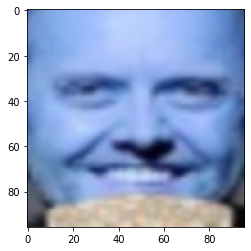

In [ ]:
plt.imshow(X_train[0])

In [ ]:
Y_train[0]

array([0, 0, 1], dtype=uint8)

In [ ]:
# from RoiPooling import RoiPoolingConv
drop_prob = 0.6

modelo = Sequential()

# modelo.add(Conv2D(input_shape=dim,filters=8,kernel_size=(7,7),padding='same',activation='relu'))
# modelo.add(AveragePooling2D())

# modelo.add(Conv2D(input_shape=dim,filters=16,kernel_size=(7,7),padding='same',activation='relu'))
# modelo.add(AveragePooling2D())

modelo.add(Conv2D(input_shape=dim,filters=32,kernel_size=(7,7),padding='same',activation='relu'))
modelo.add(MaxPooling2D())

modelo.add(Conv2D(input_shape=dim,filters=64,kernel_size=(7,7),padding='same',activation='relu'))
modelo.add(MaxPooling2D())

modelo.add(Conv2D(input_shape=dim,filters=128,kernel_size=(5,5),padding='same',activation='relu'))
modelo.add(AveragePooling2D())

# modelo.add(Conv2D(filters=256,kernel_size=(3,3), padding='same',activation='relu'))
# modelo.add(AveragePooling2D())


modelo.add(Flatten())
modelo.add(Dense(units=1024, activation='relu'))
modelo.add(Dropout(rate=drop_prob))
modelo.add(Dense(units=3, activation='softmax'))
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 32)        4736      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 64)        100416    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)            

In [ ]:
from keras.models import Model, Input, Output
from keras.layers import Dense,Flatten
from keras.applications import vgg16

mobile = tf.keras.applications.MobileNetV2(
    input_shape=dim,
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


flatten = Flatten()
new_layer = Dense(3, activation='softmax', name='my_dense_2')

inp = mobile.input
out = new_layer(flatten(mobile.output))

modelo = Model(inp, out)
modelo.summary(line_length=150)



AttributeError: ignored

In [ ]:
epocas = 15
bs = 25
lr = 0.0001
optim = Adam(lr) # Nadam, Adadelta
modelo.compile(loss = 'categorical_crossentropy',optimizer=optim,metrics=['accuracy'])

In [ ]:
historico = modelo.fit(X_train, Y_train, epochs=epocas,batch_size=bs, validation_split=0.2)#, callbacks=[checkpoint]


Epoch 1/15


ValueError: ignored

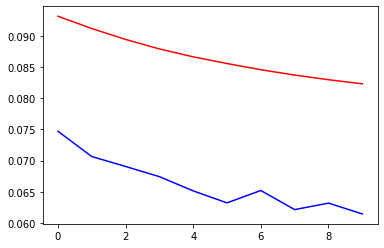

In [ ]:
plt.plot(historico.history['loss'],c='b')
plt.plot(historico.history['val_loss'],c='r')
plt.show()

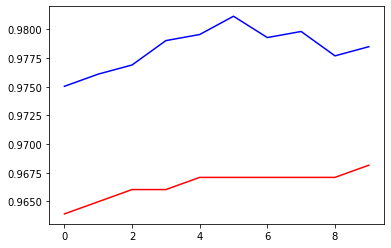

In [ ]:
plt.plot(historico.history['accuracy'],c='b')
plt.plot(historico.history['val_accuracy'],c='r')
plt.show()

In [ ]:
metricas = modelo.evaluate(X_test,Y_test,verbose=0)
print("Accuracy {:5.3}".format(metricas[1]))


Accuracy 0.962


In [ ]:
modelo.save('./last.h5')

In [ ]:
# modelo = keras.models.load_model('./best_model.h5')

In [ ]:
# metricas = modelo.evaluate(X_test,Y_test,verbose=0)
# print("Accuracy {:5.3}".format(metricas[1]))

'with_mask'

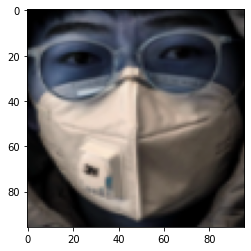

In [ ]:
import random
ind = random.randint(0,X_test.shape[0]-1)
plt.imshow(X_test[ind])
get_label(modelo.predict(X_test[ind].reshape(1,dim[0],dim[1],3)))

In [ ]:
ind

707

In [ ]:

fails_arr = [
         [0,0,0],
         [0,0,0],
         [0,0,0]
        ]
fails = []
total = [0,0,0]

i=0

Y_p = modelo.predict(X_test)
conj = zip(Y_p.argmax(axis=1),Y_test.argmax(axis=1))

for y_p,y in conj:
  total[y] = total[y] + 1
  fails_arr[y][y_p] = fails_arr[y][y_p] +1

  if y_p != y:
    fails.append(i)

  i +=1



In [ ]:
fails = np.array(fails)

In [ ]:
print("WI\tWO\tWR\t")
print("{}\t{}\t{}\tWI".format(fails_arr[0][0],fails_arr[0][1],fails_arr[0][2]))
print("{}\t{}\t{}\tWO".format(fails_arr[1][0],fails_arr[1][1],fails_arr[1][2]))
print("{}\t{}\t{}\tWR".format(fails_arr[2][0],fails_arr[2][1],fails_arr[2][2]))


WI	WO	WR	
669	13	6	WI
10	651	9	WO
21	10	627	WR


In [ ]:
print('Accuracy {:3.3f}'.format(1-(fails.shape[0]/X_test.shape[0])))
print('Size {}/{}'.format(fails.shape[0],X_test.shape[0] ))


Accuracy 0.966
Size 69/2016


In [ ]:
i=-1

0


'with_mask'

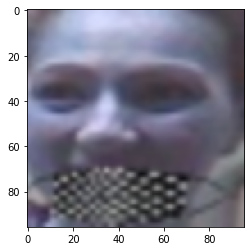

In [ ]:
# import random
i = (i+1)%fails.shape[0]
# ind = random.randint(0,fails.shape[0]-1)
print(i)
plt.imshow(X_test[fails[i]])
get_label(modelo.predict(X_test[fails[i]].reshape(1,dim[0],dim[1],3)))


In [ ]:
# import random
# from dataset_load import load_data, get_label, load_images
# image = load_images('/content/imgs/')
# ind = random.randint(0,image.shape[0]-1)
# plt.imshow(image[ind])#
# get_label(modelo.predict(image[ind].reshape(1,64,64,3)))

In [ ]:
# y = modelo.predict(image[ind].reshape(1,64,64,3))
# print('ARGMAX {}'.format(np.argmax(y)))
# y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from dataset_load_v2 import get_label,get_dicc


In [ ]:
prototxtPath = os.path.sep.join(["./", "deploy.prototxt"])
weightsPath = os.path.sep.join(["./",
"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

In [ ]:

def show(image_path):
    # image_path = "./imgs/1.jpg"
    model = tf.keras.models.load_model('./last.h5')


    image = cv2.imread(image_path)
    orig = image.copy()
    (h, w) = image.shape[:2]
    # construct a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1.0, (530, 530), #300,300
        (104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the face detections
    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with
        # the detection
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the confidence is
        # greater than the minimum confidence
        if confidence > 0.20:
            # compute the (x, y)-coordinates of the bounding box for
            # the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            if (endY-startY)>10 and (endX-startX)>10:
                # crop face and convert it from BGR to RGB
                # resize it to 64x64, and normalize it
                x_face = []
                face = image[startY:endY, startX:endX]
                face = cv2.resize(face, (dim[0],dim[1]))
                face = face/255
                x_face.append(face)
                x_face = np.array(x_face)

                # pass the face through the model to determine if the face
                # has a mask or not
                
                predicted_y = model.predict(x_face.reshape(-1,dim[0],dim[1],3))
                print(predicted_y)

                predicted_y = np.argmax(predicted_y)
                print(predicted_y)


                dicc = get_dicc()
                print(dicc[predicted_y])
                category_colors = {0: (0, 255, 0), 1: (0, 0, 255), 2: (255, 0, 0)}

                cv2.rectangle(image, (startX, startY), (endX, endY), category_colors[predicted_y], 2)
            
    plt.figure(figsize=(12,12))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

[[9.9999726e-01 4.8224263e-12 2.7822500e-06]]
0
with_mask
[[8.98643017e-01 3.03904883e-08 1.01356976e-01]]
0
with_mask
[[9.9138653e-01 1.1089913e-09 8.6135408e-03]]
0
with_mask


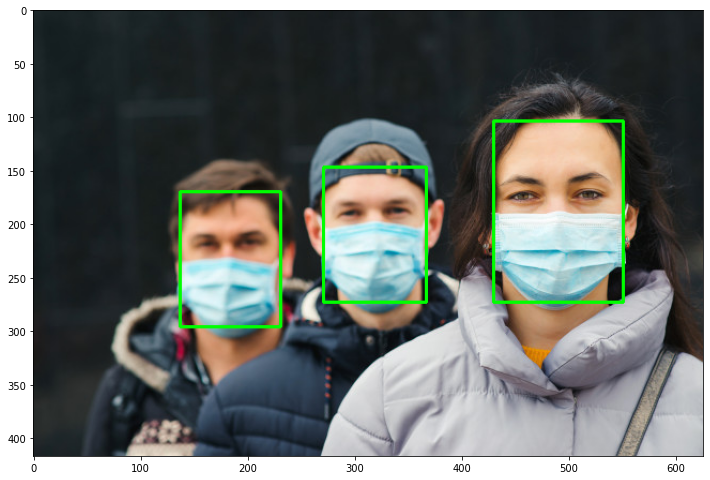

In [ ]:
show("./imgs/1.jpg")

[[9.9573946e-01 4.2588192e-07 4.2600445e-03]]
0
with_mask
[[0.5833786  0.36330456 0.05331683]]
0
with_mask
[[0.00342584 0.99111944 0.0054547 ]]
1
without_mask


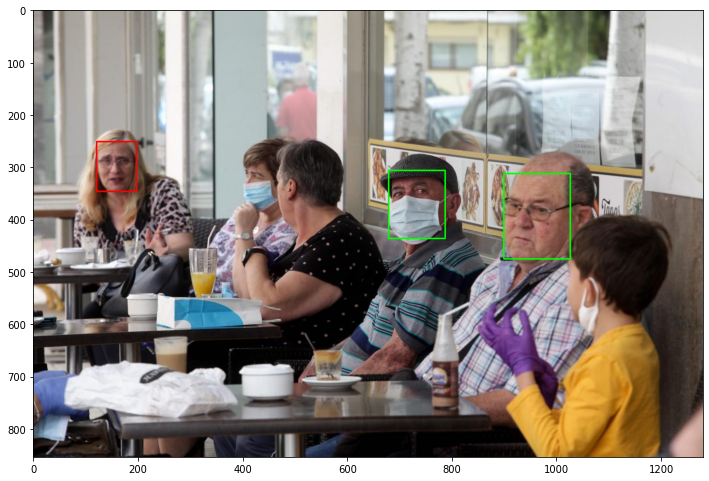

In [ ]:
show("./imgs/2.jpg")

[[9.99917150e-01 1.43565995e-08 8.28840857e-05]]
0
with_mask
[[8.5101119e-04 9.9888808e-01 2.6089014e-04]]
1
without_mask
[[9.9988842e-01 1.1405548e-07 1.1143205e-04]]
0
with_mask
[[1.000000e+00 4.055758e-10 9.305367e-14]]
0
with_mask
[[9.9999988e-01 1.7902998e-13 8.1945359e-08]]
0
with_mask
[[9.9995935e-01 3.0483508e-11 4.0618233e-05]]
0
with_mask
[[9.9968171e-01 5.1031235e-05 2.6725937e-04]]
0
with_mask
[[9.9976915e-01 3.5492612e-10 2.3084058e-04]]
0
with_mask
[[9.8876768e-01 1.0932093e-09 1.1232273e-02]]
0
with_mask
[[9.9113643e-01 2.0322640e-08 8.8635506e-03]]
0
with_mask
[[9.9973112e-01 8.6994861e-10 2.6888427e-04]]
0
with_mask
[[9.8612171e-01 3.9743787e-05 1.3838530e-02]]
0
with_mask
[[9.7987157e-01 1.1443342e-08 2.0128407e-02]]
0
with_mask
[[9.9999785e-01 4.7035602e-09 2.2041856e-06]]
0
with_mask
[[1.0000000e+00 2.2142165e-08 5.8830725e-08]]
0
with_mask
[[9.9991190e-01 1.2636315e-07 8.7920853e-05]]
0
with_mask
[[1.0000000e+00 9.0715541e-10 4.5460818e-10]]
0
with_mask
[[0.3597568

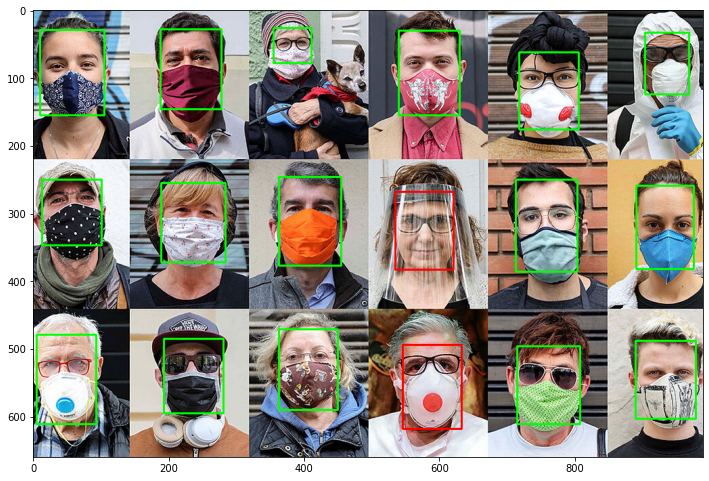

In [ ]:
show("./imgs/3.jpg")

[[9.9804449e-01 3.3549599e-10 1.9554808e-03]]
0
with_mask
[[2.6857639e-02 1.2879971e-08 9.7314239e-01]]
2
wrong_mask
[[9.5919883e-01 2.1797266e-07 4.0800940e-02]]
0
with_mask
[[8.2516036e-04 6.1800321e-08 9.9917477e-01]]
2
wrong_mask


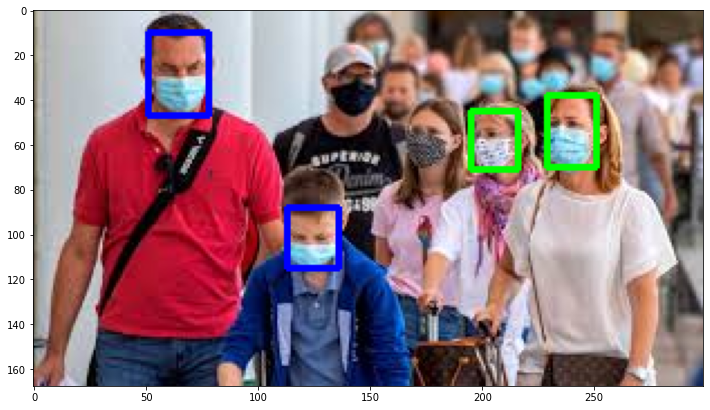

In [ ]:
show("./imgs/4.jpg")

[[8.3102965e-01 1.6789396e-05 1.6895363e-01]]
0
with_mask
[[0.00126252 0.9844008  0.01433667]]
1
without_mask
[[1.0829857e-03 9.9880230e-01 1.1463529e-04]]
1
without_mask
[[0.20052592 0.79537827 0.00409578]]
1
without_mask
[[0.04615416 0.8979182  0.05592769]]
1
without_mask
[[9.8007125e-01 1.9688440e-02 2.4029533e-04]]
0
with_mask
[[0.9825676  0.01529069 0.00214171]]
0
with_mask
[[0.05311338 0.9193376  0.02754894]]
1
without_mask


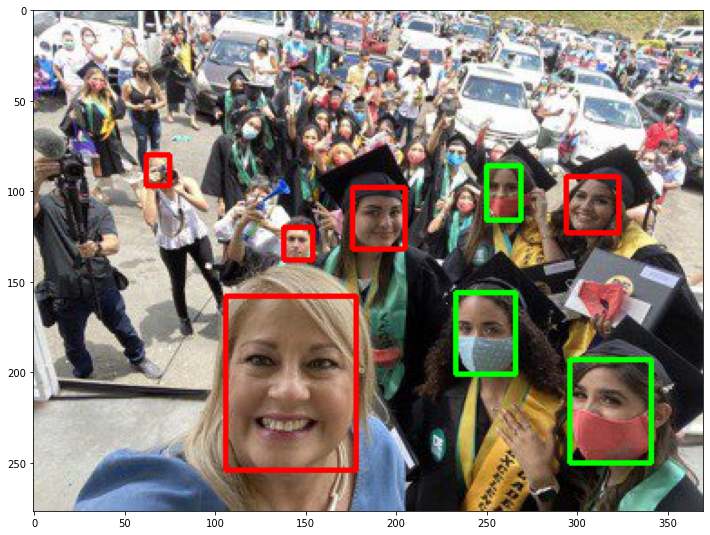

In [ ]:
show("./imgs/5.jpg")

[[9.3133491e-01 1.0812066e-07 6.8664961e-02]]
0
with_mask
[[5.9452515e-05 9.9782491e-01 2.1156794e-03]]
1
without_mask
[[9.9387300e-01 3.0206337e-07 6.1266688e-03]]
0
with_mask


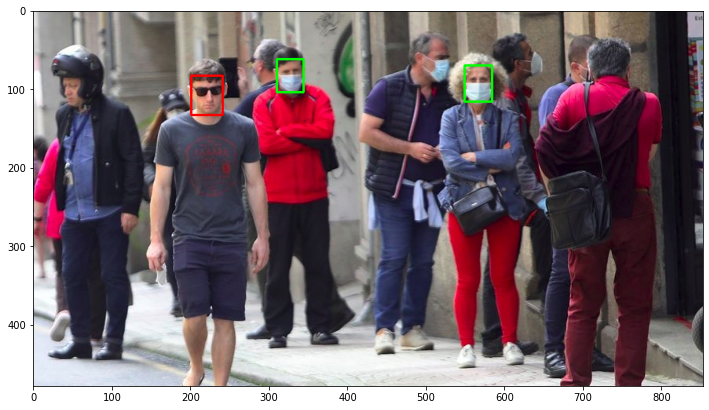

In [ ]:
show("./imgs/6.jpg")

[[9.9931240e-01 2.7164395e-05 6.6048838e-04]]
0
with_mask
[[9.9990249e-01 9.7520664e-05 7.5929094e-09]]
0
with_mask


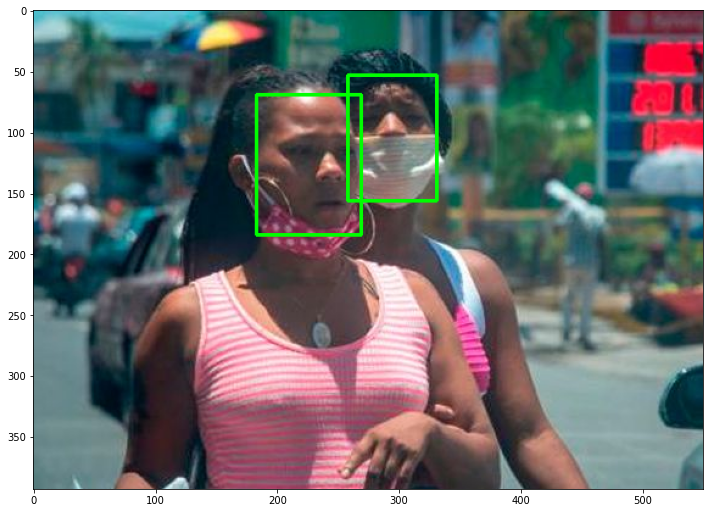

In [ ]:
show("./imgs/7.jpg")

[[9.5234466e-01 8.7859252e-07 4.7654379e-02]]
0
with_mask
[[4.7894832e-01 7.6404258e-06 5.2104402e-01]]
2
wrong_mask
[[1.9809087e-04 9.7539604e-01 2.4405763e-02]]
1
without_mask
[[9.9973804e-01 1.4608575e-08 2.6200418e-04]]
0
with_mask


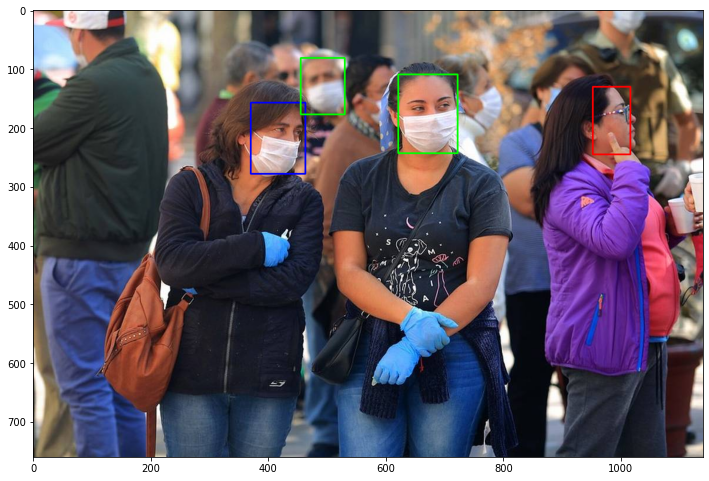

In [ ]:
show("./imgs/8.jpg")

[[0.09085867 0.45942143 0.4497199 ]]
1
without_mask
[[9.9998891e-01 1.4063928e-12 1.1060050e-05]]
0
with_mask
[[0.20194118 0.7775901  0.02046876]]
1
without_mask
[[9.9999976e-01 2.8539091e-13 1.8475318e-07]]
0
with_mask
[[9.9984884e-01 6.4307596e-12 1.5118749e-04]]
0
with_mask
[[1.9495769e-03 9.9758911e-01 4.6129542e-04]]
1
without_mask
[[0.5364058  0.4103939  0.05320036]]
0
with_mask


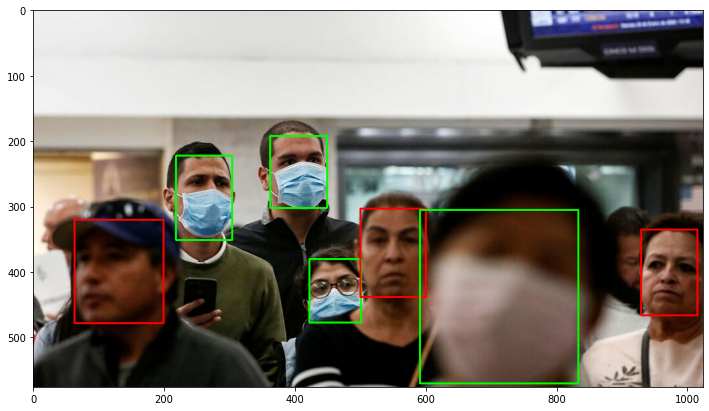

In [ ]:
show("./imgs/9.jpg")

[[2.2912423e-06 4.3847287e-08 9.9999762e-01]]
2
wrong_mask
[[9.8684847e-01 1.2621868e-02 5.2957394e-04]]
0
with_mask


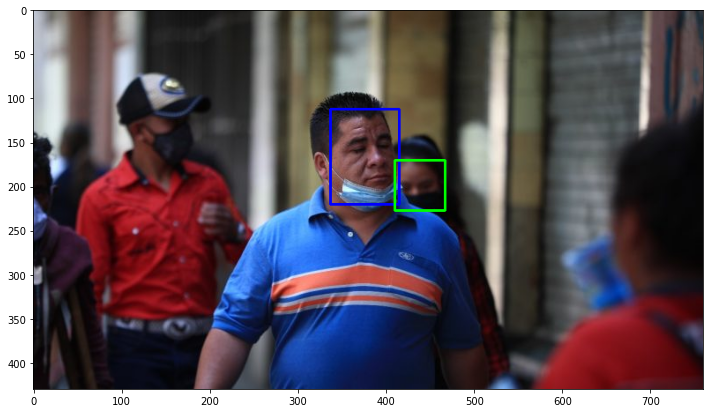

In [ ]:
show("./imgs/10.jpg")

[[3.4093145e-01 2.8631823e-05 6.5903991e-01]]
2
wrong_mask
[[0.5594235  0.34441206 0.09616447]]
0
with_mask
[[0.9846661  0.00146622 0.01386767]]
0
with_mask


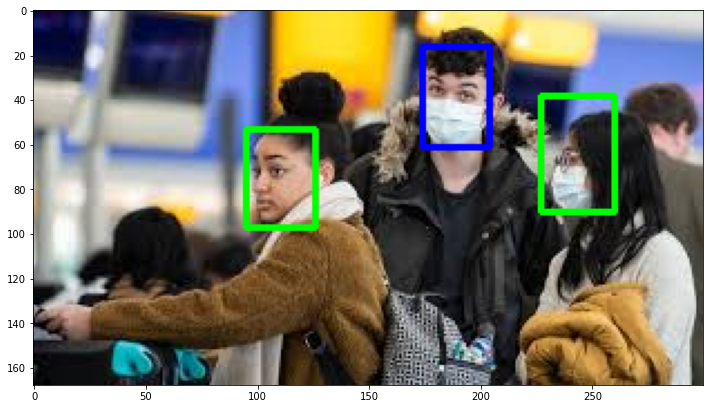

In [ ]:
show("./imgs/12.jpg")

[[9.9927980e-01 1.5257821e-07 7.2014309e-04]]
0
with_mask
[[9.9909687e-01 1.8294154e-08 9.0319547e-04]]
0
with_mask
[[9.9992871e-01 2.7389027e-09 7.1259004e-05]]
0
with_mask
[[0.1978368  0.7448807  0.05728246]]
1
without_mask


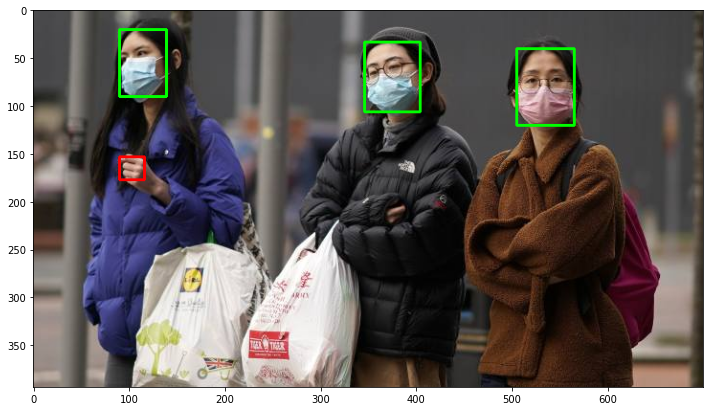

In [ ]:
show("./imgs/13.jpg")